In [236]:
'''
Retorna una lista con las distancias ordenadas del grafico
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
'''
def get_distances(ddata):
    arr_distances =[]
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):

        arr_distances.append( int(round(d[1] , 1) )) 
        
        
    #arr_distances   =arr_distances.sort() 
    return arr_distances 

In [216]:
# creado para hierarchy_test
def plot_test( df ): 
     
    # 'num_vecinos', 'num_clusters', 'silueta', 'distancia', 'num_clusters'
    x = df.index
    
    trace1 = go.Scatter(
        x=x,
        y=df.silueta,
        name='Silueta',
        mode='lines+markers'
    )
    trace2 = go.Scatter(
        x=x,
        y=df.distancia,
        name='distancia',
        yaxis='y2',
        mode='lines+markers'
    )
    trace3 = go.Scatter(
        x=x,
        y=df.num_clusters,
        name='num_clusters',
        yaxis='y3',
        mode='lines+markers'
    ) 
    
    data = [trace1, trace2, trace3  ]
    
    layout = go.Layout(
        title='Testing',
        width=900, 
        yaxis=dict(
            title='Silueta',
            titlefont=dict(
                color='#1f77b4'
            ),
            tickfont=dict(
                color='#1f77b4'
            )
        ),
        yaxis2=dict(
            title='distancia',
            titlefont=dict(
                color='#ff7f0e'
            ),
            tickfont=dict(
                color='#ff7f0e'
            ),
            anchor='free',
            overlaying='y',
            side='left',
            position=0.15
        ),
        yaxis3=dict(
            title='num_clusters',
            titlefont=dict(
                color='#d62728'
            ),
            tickfont=dict(
                color='#d62728'
            ),
            anchor='x',
            overlaying='y',
            side='right'
        ) 
    )
    fig = go.Figure(data=data, layout=layout)
    #plot_url = py.plot(fig, filename='multiple-axes-multiple')
    return fig  

In [114]:
def single_silhouette_dendrogram(dist_matrix, Z, threshold, mode='clusters',
                                 method='single', sample_names=None):
    """Compute the average silhouette at a given threshold.

    Parameters
    ----------
    dist_matrix : array-like
        Precomputed distance matrix between points.
    Z : array-like
        Linkage matrix, results of scipy.cluster.hierarchy.linkage.
    threshold : float
        Specifies where to cut the dendrogram.
    mode : ('clusters', 'thresholds'), optional
        Choose what to visualise on the x-axis.

    Returns
    -------
    x : float
        Based on mode, it can contains the number of clusters or threshold.
    silhouette_avg : float
        The average silhouette.
    """
    cluster_labels = fcluster(Z, threshold, 'distance')
    nclusts = np.unique(cluster_labels).shape[0]
  
    try:
        silhouette_list = silhouette_samples(dist_matrix, cluster_labels,
                                             metric="precomputed")
        silhouette_avg = np.mean(silhouette_list)
        x = max(cluster_labels) if mode == 'clusters' else threshold
    except ValueError as e:
        if max(cluster_labels) == 1:
            x = 1 if mode == 'clusters' else threshold
            silhouette_avg = 0
        else:
            raise(e)

    return x, silhouette_avg

In [277]:
def hierarchy_test(ddata):
    col_silueta = []
    col_clusters = []
    col_distancia = []

    for i in list(get_distances(ddata)):
        ##test
        num_clusters , coef_s  =  single_silhouette_dendrogram( squareform(data_dist) , mergings   , i   )
        col_silueta.append(coef_s)
        col_clusters.append(num_clusters)
        
        col_distancia.append(i)
  

    bench = pd.DataFrame({
        "distancia":col_distancia,
        "num_clusters": col_clusters, 
        "silueta":col_silueta 
    } )  

    bench = bench.sort_values('silueta' , ascending=False ) 
    bench = bench.reset_index(drop=True)
    bench.to_csv('bench.csv', sep=';' , index=False , decimal = ',')
    return bench 

In [249]:
def ploty_scatter(x , y ):
    # Create a trace
    trace = go.Scatter(
        x = x,   
        y = y,   
        mode = 'markers', 
        marker=dict(color= labels , colorscale=colorscale ) 
    ) 
    layout = go.Layout( 
        plot_bgcolor = '#FFFFFF',
        paper_bgcolor = '#FFFFFF' 
    )
    data = [trace] 
    fig = go.Figure(data = data, layout = layout)
    # Plot and embed in ipython notebook!
    #py.iplot(fig ,   filename='simple_scatter') 
    return fig

In [105]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%d" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [73]:
colorscale =[ 
            [0.0                 ,  '#cecece',], 
            [0.047619047619047616,  '#ffff00',],
            [0.09523809523809523 ,  '#fff21d',],
            [0.14285714285714285 ,  '#ffe52a',],
            [0.19047619047619047 ,  '#ffd733',],
            [0.23809523809523808 ,  '#ffca3a',],
            [0.2857142857142857  ,  '#ffbd40',],
            [0.3333333333333333  ,  '#ffad45',],
            [0.38095238095238093 ,  '#ffa049',],
            [0.42857142857142855 ,  '#ff904d',],
            [0.47619047619047616 ,  '#ff7f50',],
            [0.5238095238095237  ,  '#ff7f50',],
            [0.5714285714285714  ,  '#f47263',],
            [0.6190476190476191  ,  '#e96673',],
            [0.6666666666666667  ,  '#dd5a83',],
            [0.7142857142857144  ,  '#cf4d92',],
            [0.7619047619047621  ,  '#c040a1',],
            [0.8095238095238098  ,  '#b033af',],
            [0.8571428571428574  ,  '#9e25be',],
            [0.9047619047619051  ,  '#8615cd',],
            [0.9523809523809528  ,  '#6900db',], 
            [1                   ,  '#3d3d3d']]

In [198]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.plotly as py
import plotly.graph_objs as go 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.metrics import davies_bouldin_score 
import hdbscan 

from scipy.cluster.hierarchy import linkage , dendrogram ,  fcluster  
from sklearn.metrics import silhouette_samples  # , silhouette_score

#plotly.tools.set_credentials_file(username='slotbite', api_key='GYgRt3eXz6IdiIy3k7sO')
py.plotly.tools.set_credentials_file(username='cachulooo', api_key='srvpWbqoQ27WdGO3pArx')

 
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 12)
np.set_printoptions(precision=2, suppress=True)  # suppress scientific float notation

In [97]:
# Cargando datos
df = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')

In [98]:
# Eliminacion de outliers (-)
df = df[df.PRODUCT_ID > 0] 
df = df[(df.FACTURACION_PROMEDIO > 0 ) & (df.FACTURACION_PROMEDIO <= 397000 )] 
df = df[(df.SALDO_PROMEDIO > 0 ) & (df.SALDO_PROMEDIO <= 401500 )]  


## Convertimos las variables categoricas
#http://pbpython.com/categorical-encoding.html
pd.options.mode.chained_assignment = None
df["COMUNA"] = df["COMUNA"].astype('category')
df["TIPO_REPARTO"] = df["TIPO_REPARTO"].astype('category')
df["TI"] = df["TI"].astype('category')
df["TI2"] = df["TI2"].astype('category')

# luego la encodificamos 
df["TI"] = df["TI"].cat.codes
df["TI2"] = df["TI2"].cat.codes
df["COMUNA_ENC"] = df["COMUNA"].cat.codes 
df["TIPO_REPARTO"] = df["TIPO_REPARTO"].cat.codes 
df[:3]

,PRODUCT_ID,SUBSCRIPTION_ID,SUBSCRIBER_ID,COMUNA,TI,TI2,TIPO_REPARTO,QUEJAS,DAÑOS,CORTES,RECLAMOS,FACTURACION_PROMEDIO,SALDO_PROMEDIO,ROTACION_CARTERA,COMUNA_ENC
0,122551,122551,13185036,128 - San Esteban ...,0,0,0,0,0,0,0,18964.8333,33256.6667,1.753504,8
1,122581,122581,122581,128 - San Esteban ...,0,0,0,0,0,0,0,28445.7500,36605.0833,1.286793,8
2,109938,109938,3665521,145 - San Felipe ...,0,1,0,0,0,1,0,135045.4170,327823.5000,2.427488,18


In [99]:
df.columns

Index(['PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA',
       'COMUNA_ENC'],
      dtype='object')

In [100]:
columnas=['SALDO_PROMEDIO', 'ROTACION_CARTERA','FACTURACION_PROMEDIO','TI', 'TI2',
          'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS','COMUNA_ENC']

In [279]:
frac= 0.1
random = 42  
sample = df[columnas].sample(frac=frac )

In [280]:
sample.shape 

(58426, 11)

In [281]:
sample.columns

Index(['SALDO_PROMEDIO', 'ROTACION_CARTERA', 'FACTURACION_PROMEDIO', 'TI',
       'TI2', 'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'COMUNA_ENC'],
      dtype='object')

In [282]:
fig = ploty_scatter( sample.SALDO_PROMEDIO , sample.ROTACION_CARTERA )
py.iplot(fig ,   filename='scatter_hdbscan')

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 4

The draw time for this plot will be slow for clients without much RAM.


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



# Clustering jerárquico

In [ ]:
data_dist = pdist(sample ) # computing the distance
mergings = linkage(data_dist , method='ward') # computing the linkage

# original 
#mergings = linkage(sample , method='ward') 

In [103]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist ,  squareform
 ## test culero 1
c, coph_dists = cophenet(mergings, pdist(sample))
c

0.8890756127141494

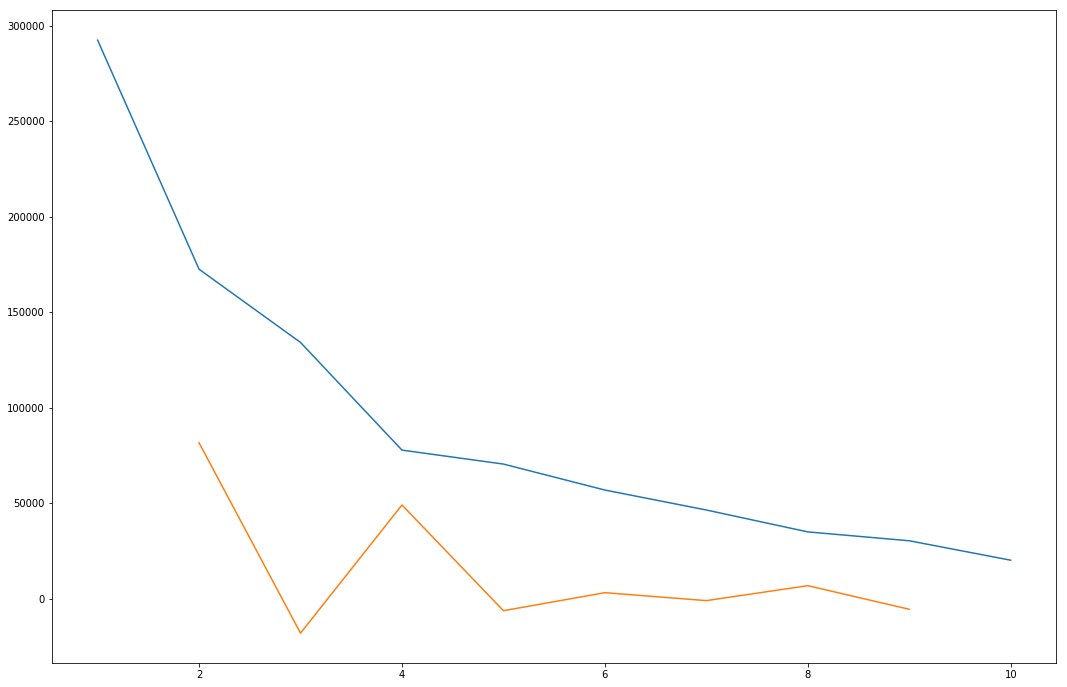

clusters: 2


In [80]:
## test culero 2
last = mergings[-10:, 2] 
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:" , k)

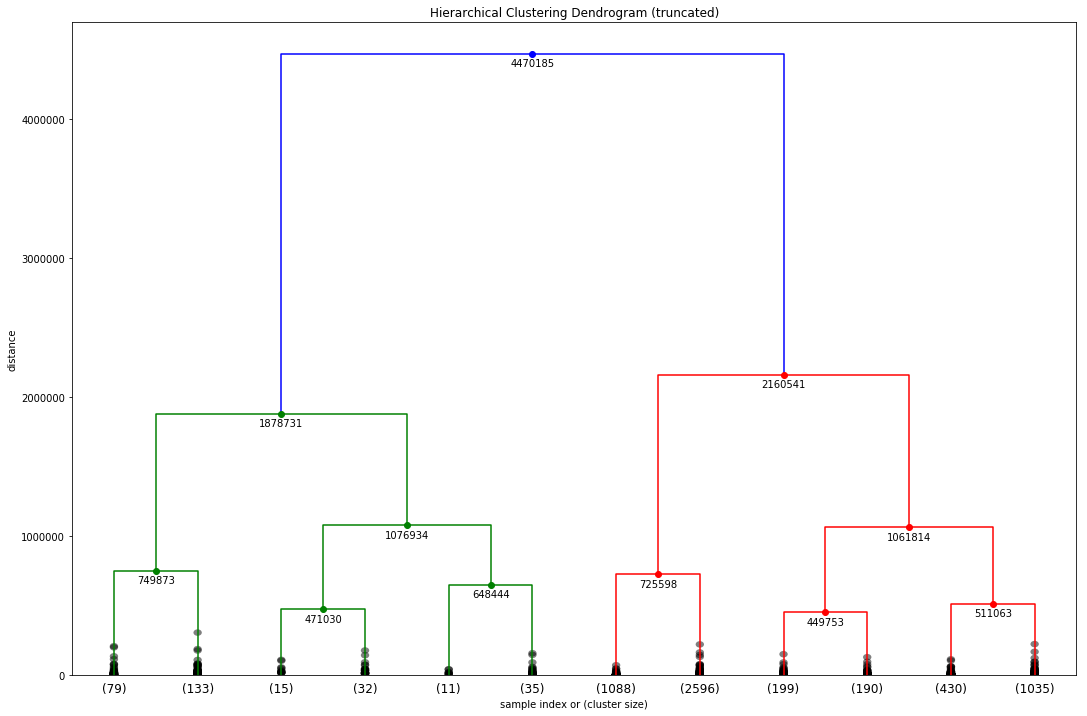

In [269]:
ddata = fancy_dendrogram(
    mergings,
    truncate_mode='lastp',
    p=12, 
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## Test 

In [278]:
py.plot(plot_test(hierarchy_test(ddata) ) , filename='multiple-axes-multiple')

'https://plot.ly/~cachulooo/36'

In [272]:
hierarchy_test(ddata) #.plot(x='num_clusters' , y='silueta')
#get_distances(ddata) 

,distancia,num_clusters,silueta
0,4470185,2,0.810029
1,1076934,5,0.543581
2,1878731,4,0.541817
3,2160541,3,0.536880
4,749873,7,0.514987
5,1061814,6,0.510439
6,648444,9,0.415396
7,511064,9,0.415396
8,725598,8,0.414575
9,449753,12,0.395706


In [229]:
# Solo de referencia 
# coef_s , num_clusters  =  single_silhouette_dendrogram( squareform(data_dist) , mergings   , 351161  ) 
# num_clusters

# Get labels

In [273]:
from scipy.cluster.hierarchy import fcluster
max_d = 1076934
clusters = fcluster(mergings, max_d, criterion='distance')
clusters

array([5, 4, 4, ..., 5, 5, 4], dtype=int32)

In [274]:
labels= clusters

In [275]:
fig = ploty_scatter( sample.SALDO_PROMEDIO , sample.ROTACION_CARTERA )
py.iplot(fig ,   filename='scatter_hdbscan') 

In [147]:
from scipy.spatial.distance import pdist ,  squareform

data_dist = pdist(sample ) # computing the distance
mergings = linkage(data_dist , method='ward') # computing the linkage
#mergings = linkage(sample , method='ward')

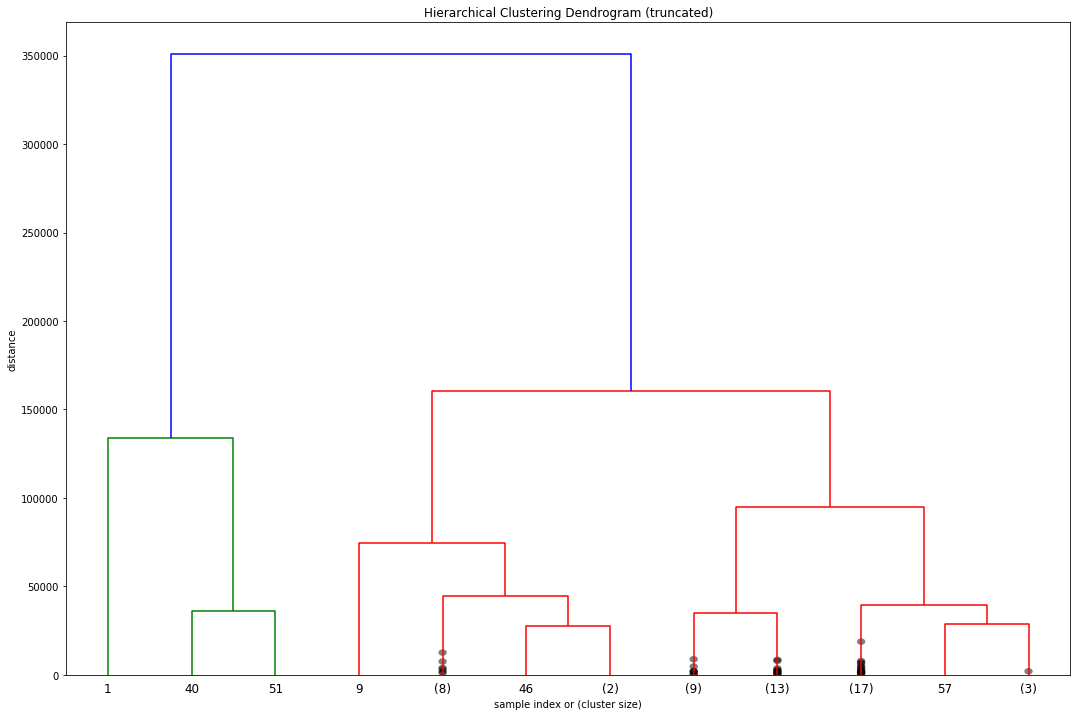

In [155]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
ddata = dendrogram(
    mergings,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged cluster
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()